#**Synapse Week Two**

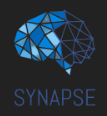

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding. Enough chitchat, lets get to work

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

https://www.geeksforgeeks.org/ml-classification-vs-regression/
(Short and Sweet)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [ ]:
!pip install shap -q  #Will be used later on

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Regression

For regression we will use insurance dataset, which contains medical costs incurred
https://drive.google.com/file/d/1ld8fGZYBi5ytg8b1CcZJvPaXfhVzIhoZ/view?usp=sharing

## Basic EDA

### Import dataset

In [ ]:
df = pd.read_csv("/content/drive/My Drive/insurance.csv")


### Use the very first steps involved in EDA -> info, head and describe

In [ ]:
df.info()

In [ ]:
df.head(100)

In [ ]:
df.describe()

### Now, plot a histogram to understand insurance charges *distribution*

In [ ]:
df['charges'].hist(bins=15, edgecolor='black', color='blue')
plt.xlabel('Charges')
plt.ylabel('No. Of People')
plt.title('Charges Distribution')
plt.show()

In [ ]:
sns.histplot(data=df, x='bmi', y='charges', bins=30)

### Plot a scatter plot between age and insurance charges

In [ ]:
sns.scatterplot(data = df , x = 'age',y = 'charges')

### Similarly, plot scatterplots for no. of children and charges, and also for bmi and charges


In [ ]:
sns.scatterplot(data = df , x ='charges' , y = 'children' )
plt.show()

In [ ]:
sns.scatterplot(data = df , x ='charges' , y = 'children',hue='bmi' )
plt.show()

In [ ]:
sns.scatterplot(data = df , y ='charges' , x = 'bmi' )
plt.show()

In [ ]:
sns.scatterplot(data = df , y ='charges' , x = 'bmi' ,hue='age')
plt.show()

### Now, use boxplots to find correlation between Sex and Charges, between Smoker and charges, and also between region and charges

In [ ]:
sns.boxplot(data=df,x='sex',y='charges')
plt.ylim(0,50000)
plt.show()

In [ ]:
sns.boxplot(data=df,x='smoker',y='charges')
plt.show()

In [ ]:
sns.boxplot(data=df,x='region',y='charges')
plt.ylim(0,50000)
plt.show()

##### Now, make a heatmap to understand correlation between all attributes

In [ ]:
d = df.copy()
d['sex'] = d['sex'].map({'male':0,'female':1})
d['smoker'] = d['smoker'].map({'yes':0,'no':1})
d = pd.get_dummies(d,columns=['region'])

cor = d.corr()

sns.heatmap(cor,annot=True)

## Question: What do you infer from the above analysis🤔

### Answer here:
Charge Distribution :

  - It has maximum distribution around 0 to 10000
  - It scatters in the range of 0 to 65000


  - SMOKER:
      * 0.79
      * strong correlation
      * highly affects the insurance charges
      * the smokers have a higher rate of charge with a median around 35000
  - AGE & BMI
      * 0.2 to 0.3
      * it ranges higher than 50000 above the age of 25
      * moderately correlated
      * Higher BMI tends to slightly increase medical charges
 - REGION , CHILDREN , SEX :
      * less tahn 0.1 do not affect it so much


### Now let's prep our data to perform Regression to predict the Incurred Charges

### Again do df.info() see how the datatype is

In [ ]:
df.info()

9### As you can see, sex, region and smoker attributes are of the object data type.
### So, convert them into numerical labels, using Label Encoder

In [ ]:
df.isna().sum()

In [ ]:
enc = df.copy()
enc['sex'] = enc['sex'].map({'female':1,'male':0})

In [ ]:
enc['smoker'] = enc['smoker'].map({'yes':1,"no":0})

In [ ]:
enc['region'] = enc['region'].map({'northeast':1,'northwest':2,"southeast":3,"southwest":4})

In [ ]:
enc= pd.get_dummies(enc,columns=['region'])

---

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()
df['sex_E'] = lb.fit_transform(df['sex'])
df['smoker_E'] = lb.fit_transform(df['smoker'])
df['region_E'] = lb.fit_transform(df['region'])

Do df.head() to see how your dataframe looks like after LabelEncoding

In [ ]:
df.head(50)

In [ ]:
enc.head(10)

## Question: What does label encoder do? 🤔

Label encoding is a fundamental data preprocessing technique used to convert categorical data into a numerical format .

### Now that you already know about standardization and normalization (I hope🙃), implement normalization here here:


##### Import MinMaxScaler from sklearn and normalize the coloums - ['age','bmi', 'children', 'charges']



### Answer:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df['age_normalized'] = scaler.fit_transform(df[['age']])
df['bmi_normalized'] = scaler.fit_transform(df[['age']])
df['children_normilized'] = scaler.fit_transform(df[['children']])

In [ ]:
print(df[['age','children','bmi','bmi_normalized','children_normilized' ,'age_normalized']].head(100))


## Question: Why standardization is not needed here? 🤔

### Answer:

That is because here we are checking for correlation with charges that is by rescaling each feature value that is normalization and not trying calculate something distance based that is  to make the mean 0 or standard deviation 1 that is standardisation

As we are going to predict Insurance Charges, let us make two sections: one containing only the 'charges', and the other containing all values except for 'charges'

In [ ]:
df.columns

In [ ]:
#independent variable
x = df[['age_normalized','bmi_normalized','children_normilized','sex_E','region_E','smoker_E']]

In [ ]:
#dependent variable
y=df['charges']

### Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

### Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#use random_state = 10 to keep the values same

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [ ]:
print("Length of training in x",len(x_train))
print("Length of testing in x",len(x_test))
print("Length of training in y",len(y_train))
print("Length of testing in y",len(y_test))

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

### The data is now split into 2 datasets of size 70% and 30% of original dataset. Surprised? 😮

### We have preprocessed our DataFrame now we'll perform Regression on this Data

### First lets understand Linear Regression, watch this video carefully it will be helpfull later on :)

https://www.youtube.com/watch?v=7ArmBVF2dCs

### A quick article
https://www.analyticsvidhya.com/blog/2021/08/understanding-linear-regression-with-mathematical-insights/

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#train a model
regr = LinearRegression()

In [ ]:
# fit the model on the training data, hint: use the fit method
regr.fit(x_train,y_train)

#### The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

#### Use regressor.predict() on X_test and store it in a variable called "y_pred". Print type and size of the y_pred.

#### Size should be 402 if everything is correct. Yeh line confirm karna hai

In [ ]:
# make predictions on the test data
y_pred = regr.predict(x_test)
print(type(y_pred))
print(len(y_pred))

In [ ]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error =",mse)

In [ ]:
r2 = regr.score(x_test,y_test)
print(r2*100)

### Visualize the predictions, plot a scatter plot of y_test vs y_pred and also plot the best fit line

In [ ]:
from sklearn.linear_model import LinearRegression
#Best Fit Line
# y = slope x + intercept
intercept = regr.intercept_
slope = regr.coef_[0]
line = slope * x['age_normalized'] + intercept
plt.plot(x['age_normalized'], line, color='red', label='Line of Best Fit')

In [ ]:
sns.scatterplot(x=y_test,y=y_pred)
#plt.plot(y_test, y_pred, color="red", linewidth=2, label="Best fit line")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],color="red", linewidth=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted")
plt.show()

# Now let's start the fun part 😃

### Have you ever wondered what happens when you call **'regressor.fit(X_train, y_train)'** ?

### To understand what's hapenning in .fit method we will be implementing Linear Regression from scratch.

In [ ]:
class LinearRegression() :

    def __init__( self, learning_rate, iterations ) :
        # initialize the learning rate and iterations provides by the user
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Function for model training
    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape

        # what does self.m and self.n represent and why are they calculated?
        '''
         m ==> training exaples that is rows in x
         n ==> num of features that is columns in x
        '''
        # self.m represents the no. of rows (samples) in training data, while self.n shows number of features in the training data
        # they are calculated for calculating the mean and var based on the number of samples and also calculating the weights
        # weight initialization
        self.w = np.zeros(self.n) # weight- slope

        self.b = 0 # set this equal to 0 (bias -  intercept)

        self.X = X  # set this equal to X (independent feature)

        self.Y = Y # set this equal to Y (dependent feature)


        # gradient descent learning
        for i in range(self.iterations) : # complete the range function

            self.update_weights()

        return self

    # Helper function to update weights in gradient descent
    def update_weights(self) :

        Y_pred = np.dot(self.X,self.w)+self.b# complete this line WX + B

        # calculate gradients
        #dw = -2 *( np.dot(self.X,(self.Y-Y_pred)) **2) /self.m # dL/dW -> L = MSE = (y -ypred)^2/m
        #db = -2 *( (self.Y-Y_pred) **2) / self.m # dL/dW -> L = MSE = (y -ypred)^2/m
        xt = np.transpose(self.X)
        dw = (1/self.m) * np.dot(xt, (Y_pred - self.Y))
        db = (1/self.m) * np.sum(Y_pred - self.Y)


        # write the code to update the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

        return self


    def predict(self,X) :

        return X.dot(self.w) + self.b


In [ ]:
model = LinearRegression( iterations = 10000, learning_rate = 0.0015 )

model.fit(x_train, y_train)


## Question: What is this function actually doing? 🤔
#### Answer Here
<br>
this function here takes the learning rate and itterations for a model and then it updates the weights based ont he itteration at the speed of the learning rate. in updating the weights we calculte a predicted value of y and then we use it to calculate the defeerential of wieghts and  biases based on mse and then update the values

### Now predict the output for the test data

### Calculate the mean squared error


### Plot a similar scatter plot as above


# Classification

#### In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [ ]:
df = pd.read_csv("/content/drive/My Drive/classified_data.txt",index_col=0)

In [ ]:
df.head()

If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

## Basic EDA

### In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [ ]:
df.info()

In [ ]:
df.describe()

### Draw boxplots for all the features for '0' and 'TARGET CLASS'

In [ ]:
sns.boxplot(x='TARGET CLASS', y='WTT', data=df)

### Question: What conclusion, if any can you draw from these boxplots?🤔
List them down below.

### Standardize the features using sklearn.preprocessing



##### import StandardScaler from Sklearn and instantiate it to a variable called "scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

##### Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform


In [ ]:
df.columns

In [ ]:
scaler.fit(df[['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']])

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [ ]:
scaled_array = scaler.transform(df[['WTT','PTI','EQW','SBI','LQE','QWG','FDJ','PJF','HQE','NXJ']])


In [ ]:
df_feat = pd.DataFrame(scaled_array, columns=['WTT','PTI','EQW','SBI','LQE','QWG','FDJ','PJF','HQE','NXQ'])
df_feat.head()

## Train/Test split

### Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.
Hint: y can be taken directly from the initial dataframe "df"

In [ ]:
x = df_feat
y = df['TARGET CLASS']

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(x_train,y_train)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [ ]:
x_pred = knn.predict(x_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,x_pred))

#### Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [ ]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
accuracy_rate = score.mean()
print(accuracy_rate*100)

In [ ]:
def accuracy(y_test,y_pred):
  accurate_values_predicted =0
  for actual,pred in zip(y_test,y_pred):
    if actual == pred :
      accurate_values_predicted +=1
  return accurate_values_predicted/len(y_test)
calculated_accuracy = accuracy(y_test, x_pred)
print(calculated_accuracy*100)

##### Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [ ]:
accuracy_rate = []

for i in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=i)
  #cross_val_score(estimator(model),x,y,cv splittter(def = 5),scoring)
  score = cross_val_score(knn,df_feat,df['TARGET CLASS'])
  accuracy_rate.append(score.mean())
print(accuracy_rate)

##### **Plot a graph of K value vs Accuracy**

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),accuracy_rate,color='green',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)

##### **Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=32)
score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
accuracy_rate = score.mean()
print(accuracy_rate*100)

# k = 32
  - since it is the value of peak accuracy after which the accuraccy doesnt deviate much
  - It is stabalised and decreased volitility is observed after that

## RESEARCH TASK:


### Study Logistic Regression, using the following resources:
https://www.datacamp.com/tutorial/understanding-logistic-regression-python

https://www.ibm.com/think/topics/logistic-regression#:~:text=In%20logistic%20regression%2C%20the%20model,value%20between%200%20and%201.

https://medium.com/@abhishekjainindore24/all-about-logistic-regression-bd135b6e3993






## **Logistic Regression**
- It is employed for binary classification tasks.
- The model predicts the probability that a specific outcome occurs.
- The output of the model is a value between 0 and 1.
- It fits an S-shaped curve to map input values to a probability.
---
- Logistic v/s Linear
  * Unlike Linear Regression (which predicts a continuous value like price or age), Logistic Regression is a classification algorithm (predicting categorical outcome)
  * Logistic Regression doesnt have a best fit line it has a sigmoid function
  * In Linear Regression, coefficients (β) are found by minimizing the sum of squared errors (Least Squares). In Logistic Regression, coefficients are found using Maximum Likelihood Estimation (MLE).
  * The coefficients (βi) in Logistic Regression cannot be interpreted directly like those in Linear Regression. Instead, they relate to the log-odds or odds ratio.

---

#Logit Function

> Z = β0 + β1 X1 + β2 X2 + ......

 linear function Z directly, the output could range from (−∞,∞). We need to convert this unbounded value Z into a probability P, which is constrained between 0 and 1.

#Transformation

Sigmoid function achieves this tranformation:

> P(x) = e^Z / (1+e^Z)

P(X) is the predicted probability (the output, 0 to 1).

e is Euler's number (approx. 2.718).

Z is the linear equation (the unbounded input).


#**Maximum Likelihood Estimation**

MLE aims to find the values for the coefficients (β0,β1,…) that make the observed data most likely to occur under the model.

    * The model calculates the predicted probability P(xi) for every datapoint i

    * It then uses the Likelihood Function (or typically the easier-to-optimize Log-Likelihood) to calculate how good those predictions are:
      1. If the actual outcome Yi is 1, the model wants P(xi) to be close to 1.
      2. If the actual outcome Yi is 0, the model wants P(xi) to be close to 0 (meaning 1-P(xi) is close to 1).

    * An optimization algorithm (usually Gradient Descent) iteratively adjusts the coefficients (β) in the direction that maximizes this Log-Likelihood until the model converges on the best set of parameters.

Likelihood Function

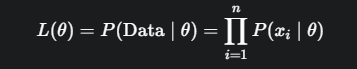

The Log Likelihood function

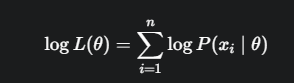

# Model Interpretation
    * Log-Odds (inteermediate step)

      - Odds can range from 0 to infinity. An odds value greater than 1 indicates a favorable outcome, less than 1 indicates an unfavorable outcome and equal to 1 means the event is just as likely to occur as not.
      - However, the odds are not symmetric around 1.
      - To address this imbalance, we take the logarithm of the odds, which transforms the unbounded [0, ∞) scale of odds to the real number line (−∞, ∞). This is known as the log-odds, or logit, and is the foundation of the logistic regression model.
      - This transformation allows logistic regression to output valid probabilities, even though we’re modeling them using a linear function underneath.


> log(p/(1-p)) = β0 + β1 X1

> (p/(1-p)) = e^ (β0 + β1 X1)

> p = e^ (β0 + β1 X1) / 1+ e^ (β0 + β1 X1)

---
- Odd Ratio

 concept that helps interpret the effect of model coefficients.

> odd(x1) = e^ (β0 + β1 X1)

if we increase x1 by one unit the new odds become:
> odd(x1+1) = e^ (β0 + β1 (X1+1))

> odd(x1+1) = e^ (β0 + β1 X1) . e^ β1

- If  b1>1, then the odds increase (event becomes more likely)

- If  b1< 1, then the odds decrease (events becomes like likely)

- If  b1=1, the odds ratio is 0, meaning the input has no effect on the odds

 odds ratio gives logistic regression its interpretability—it tells you how the odds of an event change based on inputs.

---
- Types of Logistic Regression
1. Binary Logisstic Regression

 In this approach, the response or dependent variable is dichotomous in nature—that is, it has only two possible outcomes (for example, 0 or 1).

2. Multinomial Logistic Regrssion

 In this type of logistic regression model, the dependent variable has three or more possible outcomes; however, these values have no specified order.

3. Ordinal Logistic Regression

This type of logistic regression model is leveraged when the response variable has three or more possible outcomes, but in this case, these values do have a defined order.


    





### Now implement logistic regression for the same insurance dataset we used for linear regression, and explain how it works

In [ ]:
dtf = pd.read_csv("/content/drive/My Drive/insurance.csv")

In [ ]:
dtf.head(100)

In [ ]:
dtf.info()

In [ ]:
dtf.describe()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dtf['sex'] = lb.fit_transform(dtf['sex'])
dtf['smoker'] = lb.fit_transform(dtf['smoker'])
dtf['region'] = lb.fit_transform(dtf['region'])

In [ ]:
dtf.columns

In [ ]:
feature_columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
X = dtf[feature_columns] #features
median_charge = dtf['charges'].median()
dtf['charge_class'] = np.where(dtf['charges'] > median_charge, 1, 0)
Y = dtf['charge_class'] #target

In [ ]:
print(X.dtypes)
print(Y.dtypes)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi.fit(X_train,Y_train)

In [ ]:
pred = logi.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['low charge', 'high charge']
print(classification_report(Y_test,pred,target_names=target_names))

precision = tp / tp+fp

recall = tp / tp+fn

f1 score = 2((precision * recall ) / (precision + recall))

# Inference:

Accuracy = 90%

total Samples = 402

low charge = 203

high charge = 199

# low charge (0)

Precision = it predicts low charges correctly 90% of the time

Recall = it correctly identifies 90% of all acutal low charges

# high charge (1)

Precision = it predicts high charges correctly 89% of the time

Recall = it correctly identifies 89% of all acutal high charges

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, pred)
cnf_matrix

Inference:
- TN : 182 times correctly predicted low charges ~ 0
- FP : 21 times incorrectly predicted high charges ~ 1
- FN : 21 times incorrectly predicted low charges ~ 0
- TP : 178 times correctly predicted high charges ~ 1

In [ ]:
sns.heatmap(cnf_matrix , annot = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy")
print("Total Correct Predictions =" ,(cnf_matrix[0][0]+cnf_matrix[1][1]))
print("Total Samples in Test =", (cnf_matrix[0][0]+cnf_matrix[1][1]+cnf_matrix[0][1]+cnf_matrix[1][0]))
print("Accuracy =",((cnf_matrix[0][0]+cnf_matrix[1][1])/(cnf_matrix[0][0]+cnf_matrix[1][1]+cnf_matrix[0][1]+cnf_matrix[1][0]))*100,"%")

# ALL THE BEST!!!

End of Task

©DJS Synapse 2025 - 2026